In [30]:
#se importan las librerias
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

nm=1e-9
um=1e-6
mm=1e-3
cm=1e-2

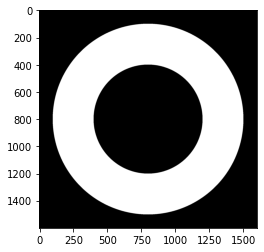

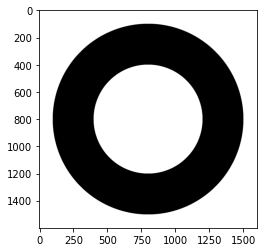

In [3]:
#Apertura circular
%matplotlib inline

radio =400
 
mask=np.zeros((1600,1600),dtype="uint8")
cv2.circle(mask,(800,800),700,1,-1)   #Radio de la apertura o es de 7000 um
cv2.circle(mask,(800,800),radio,0,-1)  #Radio del obstaculo es de x *10um
plt.imshow(mask,cmap="gray")
plt.show()

mask2=np.ones((1600,1600),dtype="uint8")
cv2.circle(mask2,(800,800),700,0,-1)   #Radio de la apertura o es de 700 um
cv2.circle(mask2,(800,800),radio,1,-1)  #Radio del obstaculo es de 312 um
plt.imshow(mask2,cmap="gray")
plt.show()

In [4]:
# ESPECTRO ANGULAR POR FFT  AngFT
def AngFT(entrada,z,dx,dy,wavelength):
    k=2*np.pi/wavelength
    U_0=entrada
    A_0=np.fft.fftshift(np.fft.fft2(U_0))
    N,M= np.shape(U_0)
    x=np.arange(-int(N/2),int(N/2),1)
    y=np.arange(-int(M/2),int(M/2),1)
    X, Y=np.meshgrid(x,y)

    #dimensiones de mundo en frecuencias
    fx=X*(1/(N*dx))
    fy=Y*(1/(M*dy))

    #transferencia
    H=np.exp(1j*k*z* np.emath.sqrt( 1 - (wavelength**2)*(fx**2+fy**2)  ))
    A_z=A_0*H
    U_z=np.fft.ifft2(A_z)
        
    return U_z

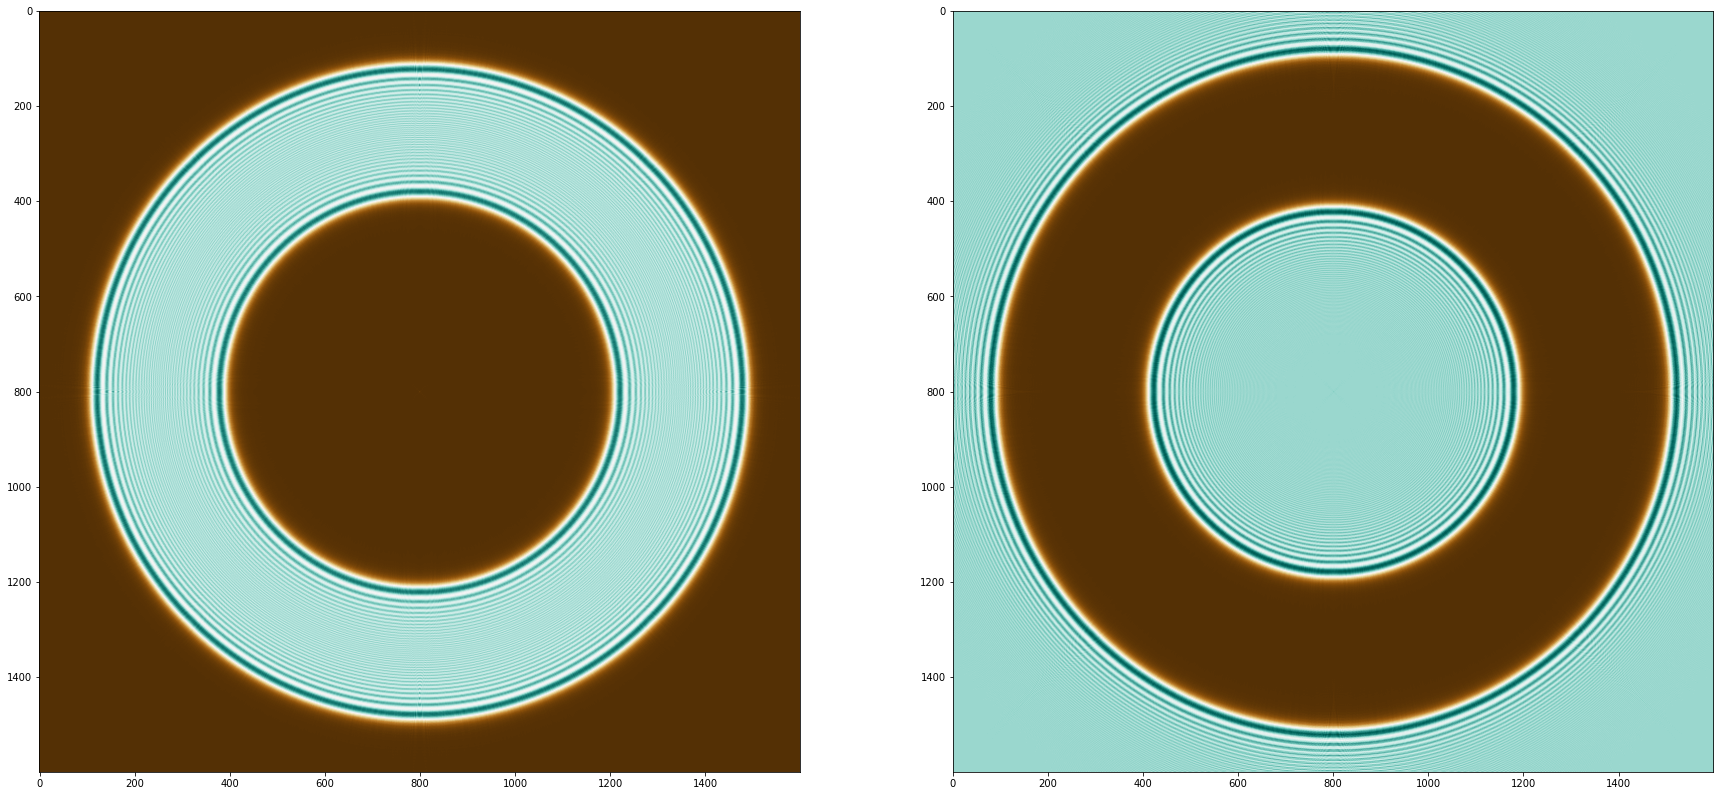

In [42]:
Tram =AngFT(mask,1*mm,1*um,1*um,633*nm)
TramC = AngFT(mask2,1*mm,1*um,1*um,633*nm)

fig, ax = plt.subplots(1,2,figsize=(30, 30))
ax[0].imshow(np.abs((Tram))**2,cmap="BrBG")
ax[1].imshow(np.abs((TramC))**2,cmap="BrBG")
plt.show()

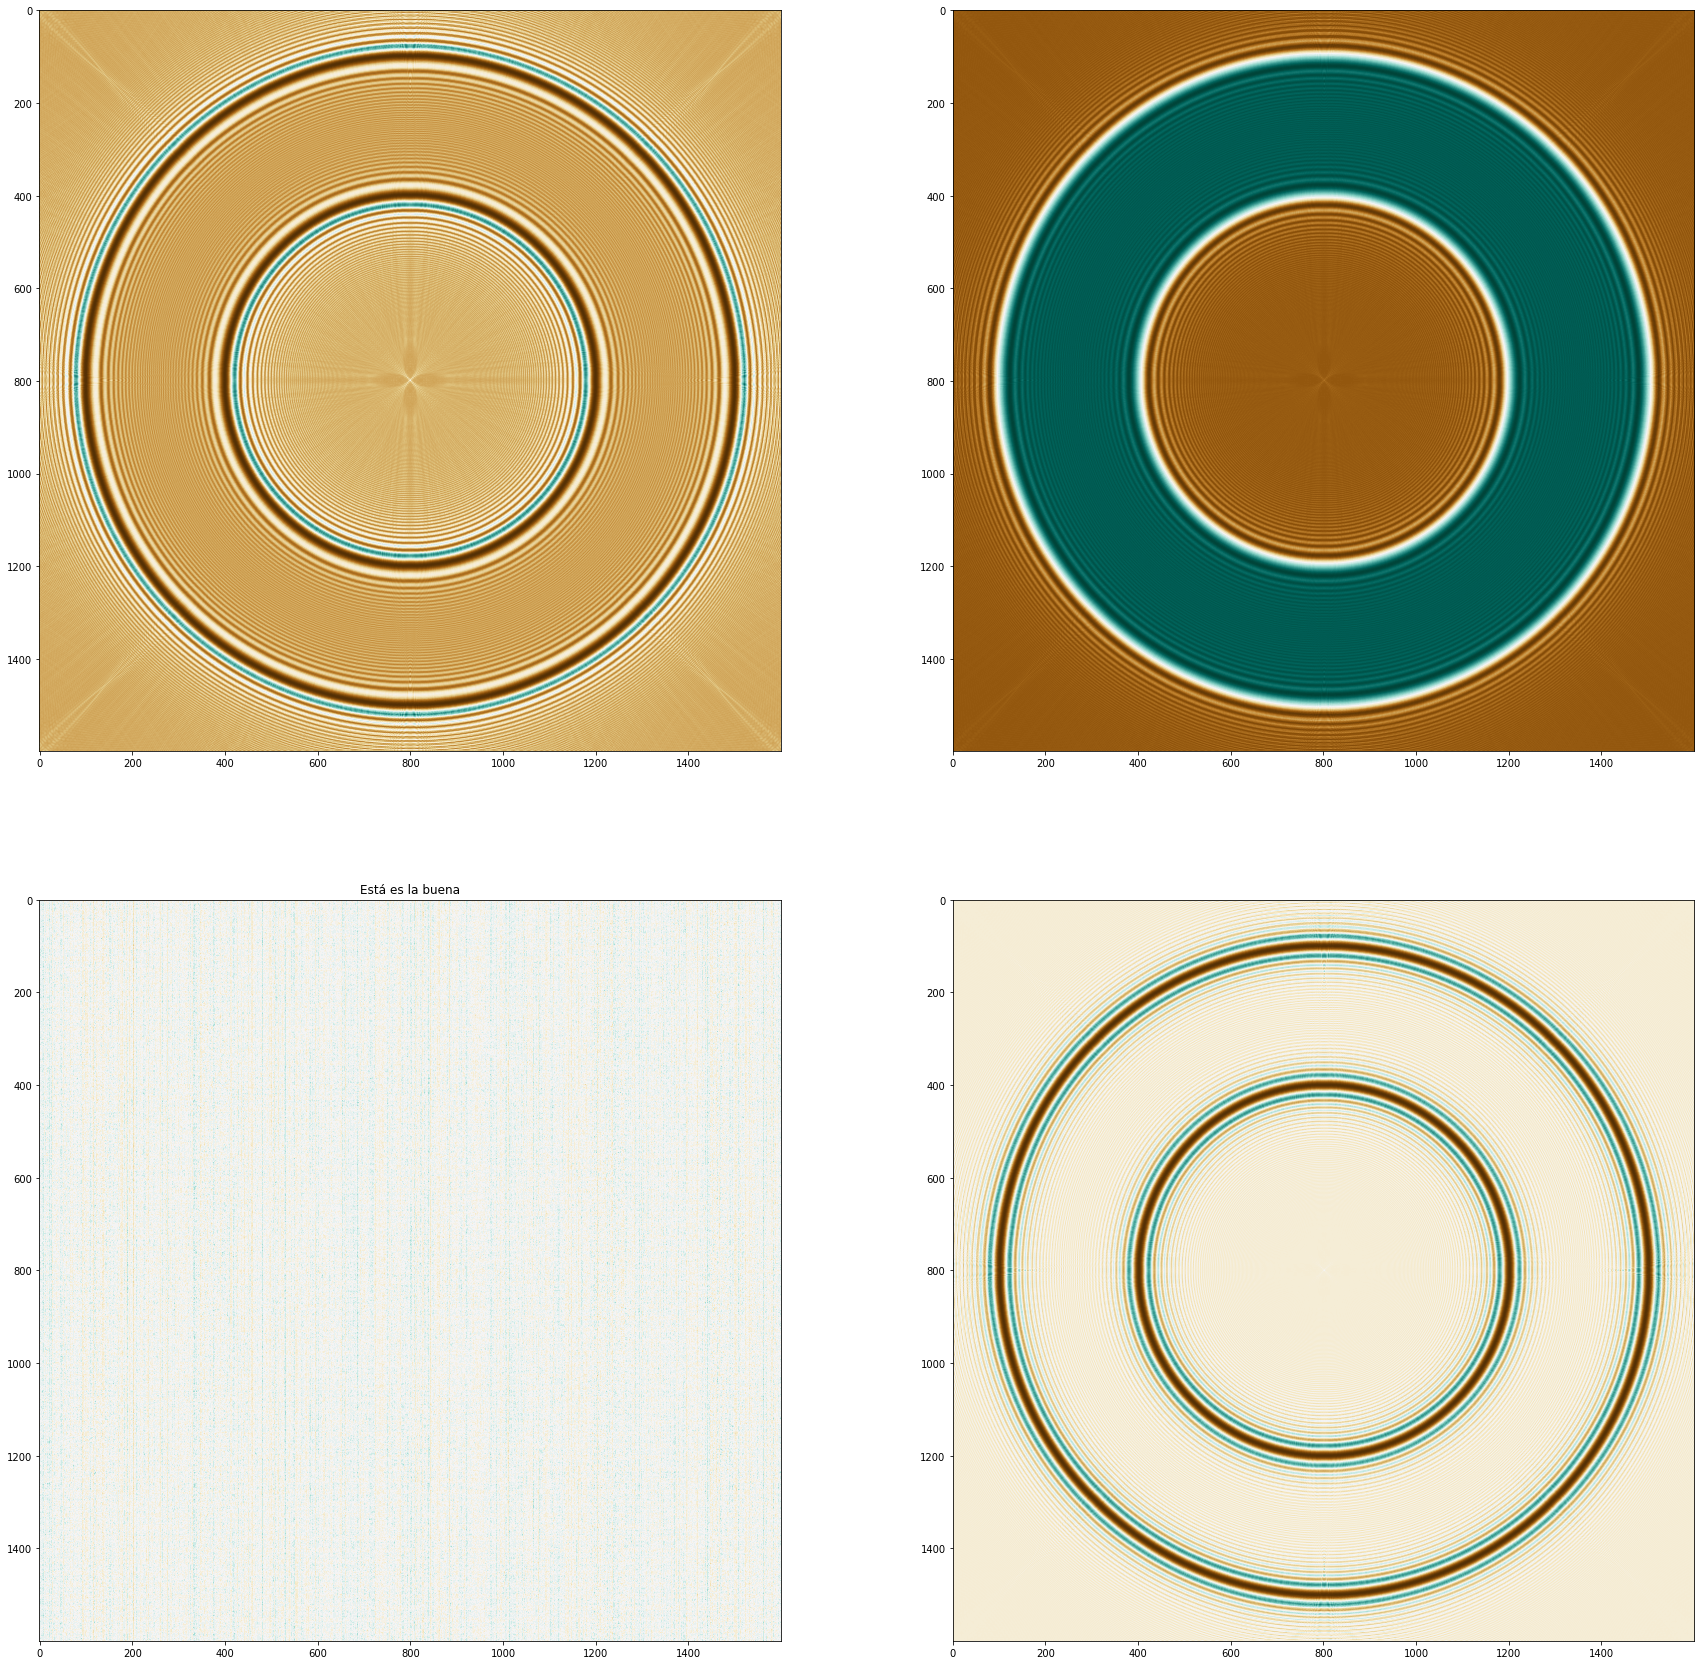

In [46]:
fig, ax = plt.subplots(2,2,figsize=(30, 30))
ax[0][0].imshow(np.abs((Tram))+np.abs((TramC))**2,cmap="BrBG")
ax[0][1].imshow(np.abs((Tram))-np.abs((TramC))**2,cmap="BrBG")
ax[1][0].imshow(np.abs((Tram+TramC))**2,cmap="BrBG")
ax[1][0].set_title("Está es la buena")
ax[1][1].imshow(np.abs((Tram-TramC))**2,cmap="BrBG")
plt.show()